# Homomorphic Filtering

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

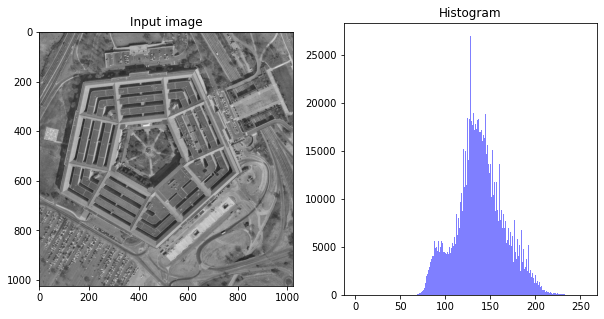

Image shape:  (1024, 1024)
Optimal size: 1024x1024


In [8]:
PATH = "images/3.2.25.tiff"
img = cv.imread(PATH, cv.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Input image")
ax[1].hist(img.ravel(), bins=256, range=(0, 256), color="blue", alpha=0.5)
ax[1].set_title("Histogram")
plt.show()

row, col = img.shape[:2]
optimal_rows = cv.getOptimalDFTSize(row)
optimal_cols = cv.getOptimalDFTSize(col)

print('Image shape: ', img.shape)
print(f'Optimal size: {optimal_rows}x{optimal_cols}')

In [3]:
def stretch(img: cv.Mat) -> cv.Mat:
    """
    Stretch the image to the range [0, 255]
    """
    min_val = np.min(img)
    max_val = np.max(img)
    img = (img - min_val) * (255 / (max_val - min_val))
    return img

In [21]:
def homomorphic_kernel(row: int, col: int, d0, c, gh, gl):
    """
    Create a homomorphic kernel
    """
    kernel = np.zeros((row, col), dtype=np.float32)
    for i in range(row):
        for j in range(col):
            x = i - row // 2
            y = j - col // 2
            r = np.exp(-(x**2 + y**2) * c / (d0**2))
            kernel[i, j] = (gh - gl) * r + gl
    return stretch(kernel)

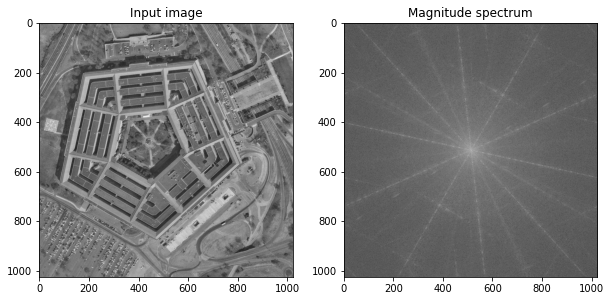

In [31]:
dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
col1, col2 = ax[0], ax[1]
col1.imshow(img, cmap="gray")
col1.set_title("Input image")
col2.imshow(magnitude_spectrum, cmap="gray")
col2.set_title("Magnitude spectrum")
plt.show()

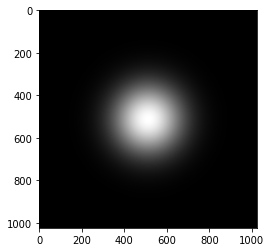

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [32]:
filter = homomorphic_kernel(row, col, d0=50, c=0.1, gh=1.2, gl=0.5)
# filter = cv.normalize(filter, None, 0, 1, cv.NORM_MINMAX)

plt.imshow(filter, cmap="gray")
plt.show()

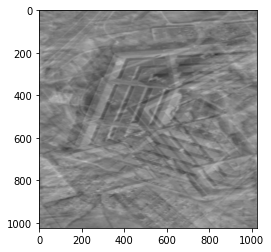

In [33]:
# magnitude, phase = cv.cartToPolar(dft_shift[:, :, 0], dft_shift[:, :, 1])
fshift = dft_shift[:, :, 0] * filter
f_ishift = np.fft.ifftshift(fshift)


output = cv.idft(f_ishift)

plt.imshow(output, cmap="gray")
plt.show()